<a href="https://colab.research.google.com/github/Luj2000/projects/blob/main/Financial%20strategy%20analysis%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moving averages are commonly used in technical analysis of stocks to predict the future price trends. In this article, we’ll develop a Python script to generate buy/sell signals using simple moving average(SMA) and exponential moving average(EMA) crossover strategy.


#The goal when using indicators is to identify trading opportunities. For example, a moving average crossover often signals an upcoming trend change. Applying the moving average crossover strategy to a price chart allows traders to identify areas where the trend changes the direction creating a potential trading opportunity.

In [ ]:
# pip install pandas-datareader

In [ ]:
# pip install pandas-datareader
#pip install tabulate

In [ ]:
import pandas as pd 
import numpy as np
from datetime import date 
import matplotlib.pyplot as plt
from datetime import datetime
from tabulate import tabulate
import pandas_datareader.data as pdr


In [ ]:
start = datetime(2020,2,1)
stop = datetime.today()

In [ ]:
stock = pdr.DataReader("SPY", "yahoo", start,stop)


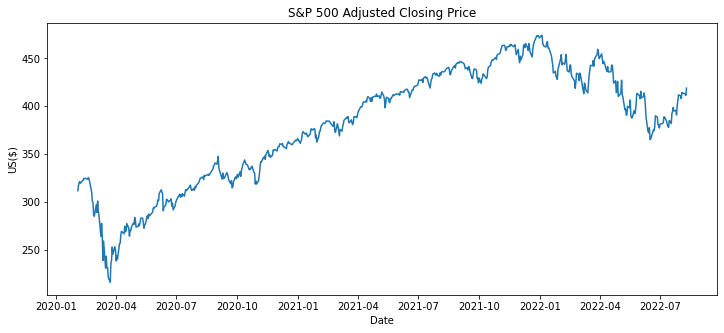

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(stock["Adj Close"])
plt.title("S&P 500 Adjusted Closing Price")
plt.xlabel("Date")
plt.ylabel("US($)");

stock['MA_20'] = stock['Adj Close'].rolling(20).mean()
stock['MA_50'] = stock['Adj Close'].rolling(50).mean()

stock.dropna(inplace=True)

In [ ]:
stock

,High,Low,Open,Close,Volume,Adj Close,MA_20,MA_50
Date,,,,,,,,
2020-04-14,284.899994,275.510010,280.980011,283.790009,134143400.0,274.497223,246.290753,278.075519
2020-04-15,283.940002,275.459991,277.570007,277.760010,121775000.0,268.664642,247.569359,277.215335
2020-04-16,280.029999,275.760010,279.149994,279.100006,131798300.0,269.960785,249.528194,276.286068
2020-04-17,287.299988,282.399994,285.380005,286.640015,146684800.0,277.253876,251.827167,275.429581
2020-04-20,286.790009,281.350006,282.609985,281.589996,100109300.0,272.369202,254.380234,274.453860
...,...,...,...,...,...,...,...,...
2022-08-04,415.089996,412.440002,414.369995,414.170013,45656600.0,414.170013,395.574002,392.300167
2022-08-05,414.149994,409.600006,409.660004,413.470001,56755600.0,413.470001,396.814001,392.725650
2022-08-08,417.619995,411.829987,415.250000,412.989990,53886100.0,412.989990,398.252000,393.072233


# moving average crossover strategy 

In [ ]:
stock["Signal"] = 0.0

In [ ]:
stock["Signal"] = np.where(stock ["MA_20"] > stock["MA_50"], 1.0, 0.0)

In [ ]:
stock["Position"] = stock["Signal"].diff()

In [ ]:
stock["Position"].unique()

array([nan,  0.,  1., -1.])

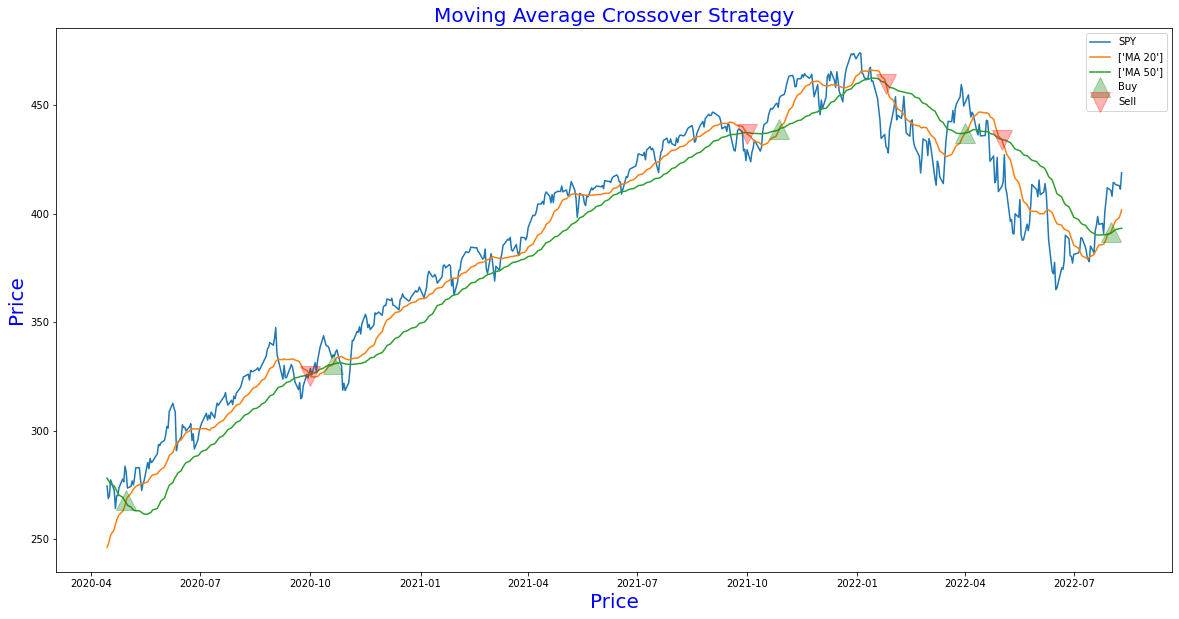

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(stock.index, stock["Adj Close"], label="SPY")
plt.plot(stock.index, stock["MA_20"], label=["MA 20"])
plt.plot(stock.index, stock["MA_50"], label=["MA 50"])
# plot Buy signals
x_buy = stock[stock["Position"] == 1].index
y_buy = stock["MA_20"][stock["Position"] == 1]
plt.plot(x_buy, y_buy, '^', markersize=20, color='g', alpha=0.3, label="Buy")
# plot Sell signals
x_sell = stock[stock["Position"] == -1].index
y_sell = stock["MA_20"][stock["Position"] == -1]
plt.plot(x_sell, y_sell, 'v', markersize=20, color='r', alpha=0.3, label="Sell")
plt.title("Moving Average Crossover Strategy", fontsize=20, color="blue")
plt.ylabel("Price", fontsize=20, color="blue")
plt.xlabel("Price", fontsize=20, color="blue")
plt.legend();

In [ ]:
df_pos = pd.DataFrame()
condition_buy = stock["Position"] ==1 
condition_sell= stock["Position"] == -1 
df_pos = stock[["Adj Close", "MA_20", "MA_50", "Signal", "Position"]][condition_buy | condition_sell ]


In [ ]:
df_pos["order"] = df_pos['Position'].apply(lambda x: 'buy' if x == 1.0 else 'sell')
df_pos

,Adj Close,MA_20,MA_50,Signal,Position,order
Date,,,,,,
2020-04-30,280.968140,267.805729,266.659553,1.0,1.0,buy
2020-10-01,328.748810,325.295689,326.127251,0.0,-1.0,sell
2020-10-20,334.932892,330.853268,330.581158,1.0,1.0,buy
2021-10-01,429.524200,436.754439,437.414337,0.0,-1.0,sell
2021-10-28,453.342712,439.177219,439.052198,1.0,1.0,buy
2022-01-25,431.261536,459.876138,460.124785,0.0,-1.0,sell
2022-04-01,450.971954,437.253352,437.206856,1.0,1.0,buy
2022-05-02,412.697266,434.024641,434.356135,0.0,-1.0,sell
2022-08-01,410.769989,391.450000,390.985603,1.0,1.0,buy


In [ ]:
print(tabulate(df_pos, headers="keys", tablefmt="psql"))

+---------------------+-------------+---------+---------+----------+------------+---------+
| Date                |   Adj Close |   MA_20 |   MA_50 |   Signal |   Position | order   |
|---------------------+-------------+---------+---------+----------+------------+---------|
| 2020-04-30 00:00:00 |     280.968 | 267.806 | 266.66  |        1 |          1 | buy     |
| 2020-10-01 00:00:00 |     328.749 | 325.296 | 326.127 |        0 |         -1 | sell    |
| 2020-10-20 00:00:00 |     334.933 | 330.853 | 330.581 |        1 |          1 | buy     |
| 2021-10-01 00:00:00 |     429.524 | 436.754 | 437.414 |        0 |         -1 | sell    |
| 2021-10-28 00:00:00 |     453.343 | 439.177 | 439.052 |        1 |          1 | buy     |
| 2022-01-25 00:00:00 |     431.262 | 459.876 | 460.125 |        0 |         -1 | sell    |
| 2022-04-01 00:00:00 |     450.972 | 437.253 | 437.207 |        1 |          1 | buy     |
| 2022-05-02 00:00:00 |     412.697 | 434.025 | 434.356 |        0 |         -1 